In [111]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import warnings
from sklearn.preprocessing import StandardScaler,LabelEncoder,OneHotEncoder,OrdinalEncoder
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay,roc_curve,classification_report,roc_auc_score
warnings.filterwarnings("ignore")

In [7]:
df = pd.read_csv("C:\\Users\\sanjay\\Documents\\All working files\\data\\machine learning data\\Heart.csv")
df = df.drop(columns=['Unnamed: 0'])

In [10]:
df.shape

(303, 14)

In [12]:
df.duplicated().sum()

0

In [13]:
df.isna().sum()

Age          0
Sex          0
ChestPain    0
RestBP       0
Chol         0
Fbs          0
RestECG      0
MaxHR        0
ExAng        0
Oldpeak      0
Slope        0
Ca           4
Thal         2
AHD          0
dtype: int64

In [14]:
df.dropna(inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        303 non-null    int64  
 1   Sex        303 non-null    int64  
 2   ChestPain  303 non-null    object 
 3   RestBP     303 non-null    int64  
 4   Chol       303 non-null    int64  
 5   Fbs        303 non-null    int64  
 6   RestECG    303 non-null    int64  
 7   MaxHR      303 non-null    int64  
 8   ExAng      303 non-null    int64  
 9   Oldpeak    303 non-null    float64
 10  Slope      303 non-null    int64  
 11  Ca         299 non-null    float64
 12  Thal       301 non-null    object 
 13  AHD        303 non-null    object 
dtypes: float64(2), int64(9), object(3)
memory usage: 33.3+ KB


In [15]:
df.head()

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


In [17]:
df['ChestPain'].unique()

array(['typical', 'asymptomatic', 'nonanginal', 'nontypical'],
      dtype=object)

In [33]:
df['ChestPain'] = df['ChestPain'].str.replace('nontypical','0').str.replace('nonanginal','1').str.replace('asymptomatic','2').str.replace('typical','3').astype('int')

In [35]:
df['Thal'].unique()

array(['fixed', 'normal', 'reversable'], dtype=object)

In [38]:
df['Thal'] = df['Thal'].str.replace('reversable','0').str.replace('normal','1').str.replace('fixed','2').astype('int')

In [41]:
label = LabelEncoder()
df['AHD'] = label.fit_transform(df['AHD'])

In [42]:

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 297 entries, 0 to 301
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        297 non-null    int64  
 1   Sex        297 non-null    int64  
 2   ChestPain  297 non-null    int32  
 3   RestBP     297 non-null    int64  
 4   Chol       297 non-null    int64  
 5   Fbs        297 non-null    int64  
 6   RestECG    297 non-null    int64  
 7   MaxHR      297 non-null    int64  
 8   ExAng      297 non-null    int64  
 9   Oldpeak    297 non-null    float64
 10  Slope      297 non-null    int64  
 11  Ca         297 non-null    float64
 12  Thal       297 non-null    int32  
 13  AHD        297 non-null    int32  
dtypes: float64(2), int32(3), int64(9)
memory usage: 31.3 KB


In [44]:
X = df.drop(columns=['AHD'],axis=1)
y = df['AHD']

In [45]:
X_train,X_test , y_train, y_test = train_test_split(X,y,test_size=0.1,random_state=101)

In [46]:
std = StandardScaler()
scaled_X_train = std.fit_transform(X_train)

In [48]:
scaled_X_test = std.transform(X_test)

In [56]:
model = LogisticRegression(max_iter=5000,solver='saga')

penalty = ['l1','l2','elasticnet']
C = np.logspace(0,20,15)
l1_ratio = np.linspace(0,1,10)
param_grid = {'penalty':penalty,
              'l1_ratio':l1_ratio,
              'C':C}

In [57]:
grid_model = GridSearchCV(model,param_grid=param_grid)

In [58]:
grid_model.fit(scaled_X_train,y_train)

GridSearchCV(estimator=LogisticRegression(max_iter=5000, solver='saga'),
             param_grid={'C': array([1.00000000e+00, 2.68269580e+01, 7.19685673e+02, 1.93069773e+04,
       5.17947468e+05, 1.38949549e+07, 3.72759372e+08, 1.00000000e+10,
       2.68269580e+11, 7.19685673e+12, 1.93069773e+14, 5.17947468e+15,
       1.38949549e+17, 3.72759372e+18, 1.00000000e+20]),
                         'l1_ratio': array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ]),
                         'penalty': ['l1', 'l2', 'elasticnet']})

In [62]:
grid_model.best_estimator_

LogisticRegression(C=26.826957952797258, l1_ratio=0.0, max_iter=5000,
                   penalty='l1', solver='saga')

In [85]:
final_model = LogisticRegression(penalty='l1',solver='saga',C=26.82,max_iter=5000)

In [86]:
final_model.fit(scaled_X_train,y_train)

LogisticRegression(C=26.82, max_iter=5000, penalty='l1', solver='saga')

In [87]:
final_model.coef_

array([[-0.13454474,  0.54505475,  0.14108795,  0.32610686,  0.16578365,
        -0.34361815,  0.22266739, -0.66630845,  0.61393776,  0.31017746,
         0.24035485,  1.07829825, -0.6510638 ]])

In [88]:
coef = pd.Series(index=X.columns, data=final_model.coef_[0])
coef = coef.sort_values()

<Axes: xlabel='None'>

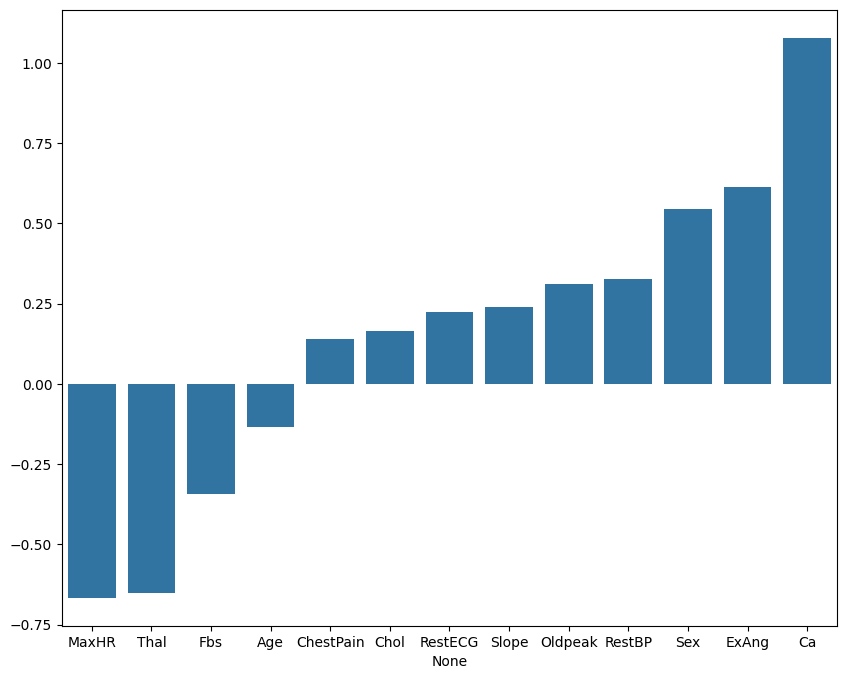

In [89]:
import seaborn as sns
plt.figure(figsize=(10,8))
sns.barplot(x=coef.index, y=coef.values)


In [90]:
y_pred = final_model.predict(scaled_X_test)

In [92]:
accuracy_score(y_test,y_pred)

0.8333333333333334

In [95]:
cm = confusion_matrix(y_test,y_pred,labels=final_model.classes_)
cm

array([[17,  2],
       [ 3,  8]], dtype=int64)

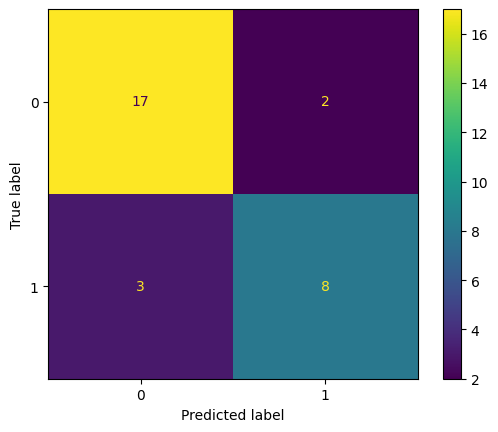

In [97]:
cmd = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=final_model.classes_)
cmd.plot()

In [98]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87        19
           1       0.80      0.73      0.76        11

    accuracy                           0.83        30
   macro avg       0.82      0.81      0.82        30
weighted avg       0.83      0.83      0.83        30



In [101]:
y_score = final_model.predict_proba(scaled_X_test)[:,1]

In [109]:
fpr,tpr,thresholds = roc_curve(y_test,y_score)

In [110]:
thresholds

array([       inf, 0.99202846, 0.98365716, 0.68554726, 0.66176677,
       0.64228576, 0.40700902, 0.40634391, 0.30221228, 0.02784342])

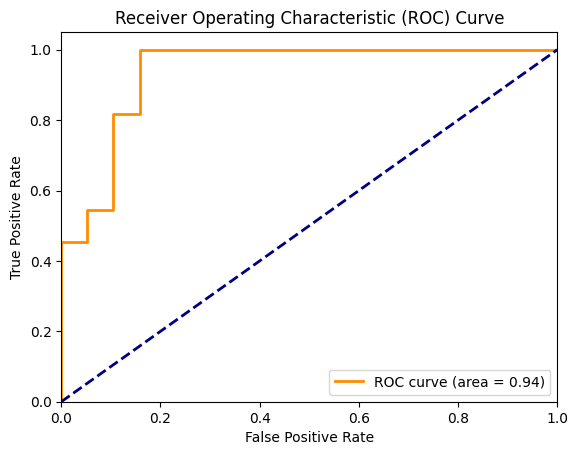

In [112]:
roc_auc = roc_auc_score(y_test, y_score)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [113]:
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print("Optimal threshold is:", optimal_threshold)

Optimal threshold is: 0.30221227736541256
